In [1]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Munging

"Data munging is a set of concepts and a methodology for taking data from unusable and erroneous forms to the new levels of structure and quality required by modern analytics processes and consumers." [Ref](https://www.talend.com/resources/what-is-data-munging/)

## Dealing with missing data

Often dataset have missing values, which when loaded into python can result in nan's (Not A Number).

In [2]:
ramen = Table().read_table("ramen-ratings.csv")

In [3]:
ramen

Review #,Brand,Variety,Style,Country,Stars,Top Ten
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,nan
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,nan
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,nan
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,nan
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,nan
2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,nan
2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,nan
2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,nan
2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,nan
2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,nan


If you look at the CSV file, you will see that the column "Top Ten" only has ten entries; the rest of the column values are blank. Although it appears that there is also at least one entry with just a carriage return ('\n').

In [4]:
# Print all the unique entries in the column
np.unique(ramen.column("Top Ten"))

array(['\n', '2012 #1', '2012 #10', '2012 #2', '2012 #3', '2012 #4',
       '2012 #5', '2012 #6', '2012 #7', '2012 #9', '2013 #1', '2013 #10',
       '2013 #2', '2013 #3', '2013 #4', '2013 #6', '2013 #9', '2014 #1',
       '2014 #10', '2014 #4', '2014 #5', '2014 #6', '2014 #7', '2014 #8',
       '2014 #9', '2015 #1', '2015 #10', '2015 #4', '2015 #6', '2015 #7',
       '2015 #8', '2015 #9', '2016 #1', '2016 #10', '2016 #5', '2016 #7',
       '2016 #8', '2016 #9', 'nan'],
      dtype='<U32')

**Important point:** These are not true numpy nans, but just the string 'nan' so we can find and replace them with the where command.

Suppose we want to replace all of the lines that have nans or '\n' with the string "Not in top 10" 

In [5]:
# create a function that accepts a single value
def replace_nan(x):
    if x == 'nan':
        return "Not in top 10"
    elif x == '\n':
        return "Not in top 10"
    else:
        return x

In [6]:
# Use our function to replace values in the Top Ten column using apply()
ramen = ramen.with_column('Top Ten', ramen.apply(replace_nan, 'Top Ten') )
ramen.show(3)

Review #,Brand,Variety,Style,Country,Stars,Top Ten
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Not in top 10
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,Not in top 10
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Not in top 10


**Mission Accomplished!**

### What if we have true np.nan values in our data set?

In [7]:
# Load one of the candidate group project data sets. This one is about air quality.
url = "https://opendata.arcgis.com/api/v3/datasets/3899a065577747fbb824f0a21afc2e7c_0/downloads/data?format=csv&spatialRefId=4326"
air = Table.read_table(url)
air.show(3)

X,Y,OBJECTID,SITE_NAME,SITE_ID,SITE_TYPE,SITE_ADDRESS,CARBON_MONOXIDE_PPM,NITROGEN_DIOXIDE_PPM,OZONE_PPM,PM10_UG_M3,PM25_UG_M3,SULFUR_DIOXIDE_PPB,SAMPLE_TIMESTAMP,SAMPLE_HOUR
-74.9852,40.0542,706768,TOR,421010075,nan,4901 GRANT AVENUE & JAMES STREET,0.246012,8.8731,nan,nan,7.09269,nan,2023/11/29 06:00:00+00,1 - 2
-75.1869,39.9229,706769,RIT,421010055,nan,"24TH ST. & RITNER ST., PHILADELPHIA, PA 19145",nan,nan,nan,nan,5.13439,0.166194,2023/11/29 06:00:00+00,1 - 2
-75.1424,39.9603,706770,FAB,421010057,nan,240 SPRING GARDEN STREET,nan,nan,nan,nan,5.35704,nan,2023/11/29 06:00:00+00,1 - 2


In [8]:
ozone_values = np.unique(air.column('OZONE_PPM'))
ozone_values

array([ 22.7624426,  25.5883331,  28.8483429,         nan])

In [9]:
np.isnan(ozone_values[3])

True

Yup! That is a true nan value. We cannot remove these with the where() method because Equality doesn't work for nans.

In [10]:
np.nan == np.nan

False

Wow! That is confusing. It turns out you cannot test for equality with nans, but you can identify them. Numpy has a method for this.

In [11]:
test = make_array( 5, 8, 12, np.nan, 2, 1)
test

array([  5.,   8.,  12.,  nan,   2.,   1.])

In [12]:
np.isnan(test)

array([False, False, False,  True, False, False], dtype=bool)

We can use this to replace the nans in our data table. Let's say we wanted to replace all the OZONE_PPM values that are nan with zeros. How do we do this? Again, we can start by writing a function.

In [13]:
# create a function that accepts a single value
def replace_true_nan(x):
    if np.isnan(x):
        return 0
    else:
        return x

In [14]:
# Test the function
for x in test:
    print(replace_true_nan(x))

5.0
8.0
12.0
0
2.0
1.0


In [15]:
# Use our function to replace values in the Top Ten column using apply()
air2 = air.with_column('OZONE_PPM', air.apply(replace_true_nan, 'OZONE_PPM'))
air2.show(3)

X,Y,OBJECTID,SITE_NAME,SITE_ID,SITE_TYPE,SITE_ADDRESS,CARBON_MONOXIDE_PPM,NITROGEN_DIOXIDE_PPM,OZONE_PPM,PM10_UG_M3,PM25_UG_M3,SULFUR_DIOXIDE_PPB,SAMPLE_TIMESTAMP,SAMPLE_HOUR
-74.9852,40.0542,706768,TOR,421010075,nan,4901 GRANT AVENUE & JAMES STREET,0.246012,8.8731,0,nan,7.09269,nan,2023/11/29 06:00:00+00,1 - 2
-75.1869,39.9229,706769,RIT,421010055,nan,"24TH ST. & RITNER ST., PHILADELPHIA, PA 19145",nan,nan,0,nan,5.13439,0.166194,2023/11/29 06:00:00+00,1 - 2
-75.1424,39.9603,706770,FAB,421010057,nan,240 SPRING GARDEN STREET,nan,nan,0,nan,5.35704,nan,2023/11/29 06:00:00+00,1 - 2


### ... or you can use Pandas
What I just demonstrated is how to deal with nan's within the world of Data 8's data tables. Outside this class, Pandas dateframes are the weapon of choice for pythonistas working with tabular data. Pandas had many built in methods for dealing with missing data, and you'll need to learn pandas as you continue your python journey.

Let's repeat the same operation of replacing nan's in the OZONE_PPM column using pandas.

In [16]:
import pandas as pd

# Convert the data table to a pandas dataframe
df = air.to_df()

# Replace the nans in a column
df['OZONE_PPM'] = df['OZONE_PPM'].replace(np.nan, 0)

# Convert the pandas dataframe back into a data table
air3 = Table().from_df(df)
air3.show(3)

X,Y,OBJECTID,SITE_NAME,SITE_ID,SITE_TYPE,SITE_ADDRESS,CARBON_MONOXIDE_PPM,NITROGEN_DIOXIDE_PPM,OZONE_PPM,PM10_UG_M3,PM25_UG_M3,SULFUR_DIOXIDE_PPB,SAMPLE_TIMESTAMP,SAMPLE_HOUR
-74.9852,40.0542,706768,TOR,421010075,nan,4901 GRANT AVENUE & JAMES STREET,0.246012,8.8731,0,nan,7.09269,nan,2023/11/29 06:00:00+00,1 - 2
-75.1869,39.9229,706769,RIT,421010055,nan,"24TH ST. & RITNER ST., PHILADELPHIA, PA 19145",nan,nan,0,nan,5.13439,0.166194,2023/11/29 06:00:00+00,1 - 2
-75.1424,39.9603,706770,FAB,421010057,nan,240 SPRING GARDEN STREET,nan,nan,0,nan,5.35704,nan,2023/11/29 06:00:00+00,1 - 2


Pandas had many other methods for dealing with nans, including dropping those row, filling with a value, and intepolating between neighboring value. You can read all about it [here](https://pandas.pydata.org/docs/user_guide/missing_data.html).

## Data Parsing 

Let's take a quick look at another one of the suggested data sets or the Group Project: Near Earth Objects.

In [17]:
url = '../Group-project/data/cneos_closeapproach_data.csv'
neo = Table.read_table(url)
neo

Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,Unnamed: 8
509352 (2007 AG),1900-Jan-04 22:25 ± 00:02,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m,a0509352
(2014 SC324),1900-Jan-11 01:07 ± 00:18,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m,bK14SW4C
(2012 UK171),1900-Jan-12 23:07 ± 00:13,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.4,34 m - 77 m,bK12UH1K
4660 Nereus (1982 DB),1900-Jan-29 18:10 ± 00:35,8.09 | 0.02080,8.08 | 0.02077,5.54,5.52,18.6,0.33±0.05 km,a0004660
(2015 RW83),1900-Feb-04 03:50 ± 14:49,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m,bK15R83W
(2009 BW2),1900-Feb-04 06:16 ± 3_02:30,6.40 | 0.01646,6.40 | 0.01644,4.44,4.41,25.1,25 m - 57 m,bK09B02W
(2002 LY1),1900-Feb-05 22:08 ± < 00:01,19.09 | 0.04904,19.08 | 0.04903,10.97,10.97,22.3,92 m - 210 m,bK02L01Y
348306 (2005 AY28),1900-Feb-05 23:42 ± < 00:01,13.27 | 0.03409,13.27 | 0.03409,17.36,17.36,21.5,130 m - 290 m,a0348306
378160 (2006 WX1),1900-Feb-10 05:07 ± 00:02,14.35 | 0.03688,14.32 | 0.03680,10.36,10.35,19.6,320 m - 710 m,a0378160
(2020 DK),1900-Feb-10 17:56 ± 9_08:41,8.30 | 0.02132,2.87 | 0.00738,9.9,9.89,26.1,16 m - 36 m,bK20D00K


This is a really cool data set! Asteroids that may or may not be on a collision path with Earth. What's not to love? Well, the way the data are formatted, for one. Suppose we wanted to make a histogram of asteroid diameters. Look what we have to work with!

In [38]:
neo.column('Diameter')[0:30]

array(['250 m -  570 m', '37 m -   82 m', '34 m -   77 m', '0.33±0.05 km',
       '40 m -   90 m', '25 m -   57 m', '92 m -  210 m', '130 m -  290 m',
       '320 m -  710 m', '16 m -   36 m', '250 m -  570 m',
       '36 m -   79 m', '16 m -   36 m', '46 m -  100 m', '5.6 m -   12 m',
       '0.459±0.004 km', '16 m -   36 m', '23 m -   51 m',
       '170 m -  380 m', '13 m -   29 m', '10 m -   23 m', '10 m -   22 m',
       '67 m -  150 m', '160 m -  350 m', '8.8 m -   20 m',
       '64 m -  140 m', '180 m -  390 m', '21 m -   47 m', '92 m -  210 m',
       '19 m -   42 m'],
      dtype='<U32')

UGH!  Sometimes the diameter is given in meters. Sometimes in kilometers. For some a range is given. For other, it is a value with a +/-. 

**What do we do with this?**

We need to make a plan, and document it as we go. Here it what I choose to do:

1. If a range is given, find the average.
2. Drop any +/-.
3. Convert the value from a string to an number.
4. Convert all diameters to meters.

Rather than just give you the final function, I will walk you through the creation process.

In [19]:
# Create test cases
test1 = '250 m -  570 m'
test2 = '0.459±0.004 km'

**For test 1:**

Notice that the first element in the string is the lower bound on the diameter and the second to last element is the upper bound. We can split the string (which returns a list of the values split on the spaces.

In [20]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        print(x[0], x[-2])

In [21]:
convert_diameter(test1)

250 570


That is a good start. Now make the function return the average.

In [22]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        return np.mean([float(x[0]), float(x[-2])])

In [23]:
convert_diameter(test1)

410.0

Looks good. Now let's tackle the second case. Instead of splitting on spaces, we will split on the '±', keeping the first element.

In [24]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        return np.mean([float(x[0]), float(x[-2])])
    elif '±' in x:
        x = x.split('±')
        print(x[0])

In [25]:
convert_diameter(test2)

0.459


Great! But we need to convert this to a number and from kilometers to meters.

In [26]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        return np.mean([float(x[0]), float(x[-2])])
    elif '±' in x:
        x = x.split('±')[0]
        return 1000 * float(x)

In [27]:
convert_diameter(test2)

459.0

Bingo! But what if there is number somewhere in the diameter column that does not fit either of our two type cases? Better check.

In [28]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        return np.mean([float(x[0]), float(x[-2])])
    elif '±' in x:
        x = x.split('±')[0]
        return 1000 * float(x)
    else:
        print("This value is unexpected:", x)

Fingers crossed, we will apply this function to the entire column in the data table.

In [29]:
neo2 = neo.with_column('Diameter', neo.apply(convert_diameter, 'Diameter'))

This value is unexpected: 0.7 km
This value is unexpected: 0.33 km
This value is unexpected: 0.03 km
This value is unexpected: 0.33 km
This value is unexpected: 0.5 km
This value is unexpected: 1.4 km
This value is unexpected: 0.03 km
This value is unexpected: 0.7 km
This value is unexpected: nan
This value is unexpected: 0.4 km
This value is unexpected: 0.3 km
This value is unexpected: 0.55 km
This value is unexpected: 5.2 km
This value is unexpected: 0.7 km
This value is unexpected: 1.5 km
This value is unexpected: 0.03 km
This value is unexpected: 0.6 km
This value is unexpected: 0.472 km
This value is unexpected: 0.3 km
This value is unexpected: 0.472 km
This value is unexpected: 0.3 km
This value is unexpected: 0.33 km
This value is unexpected: 1.9 km
This value is unexpected: 0.3 km
This value is unexpected: 0.4 km
This value is unexpected: 0.33 km
This value is unexpected: 0.4 km
This value is unexpected: 3.4 km
This value is unexpected: nan
This value is unexpected: 1.8 km
This

*DARN!!* It turn out there are two more test cases needed.

In [30]:
# Create test cases
test1 = '250 m -  570 m'
test2 = '0.459±0.004 km'
test3 = '1.4 km'

For test case three, we are looking for strings that contain 'km', but not '±'. Since we already check for '±', we just need to add a check for 'km' after it.

In [31]:
def convert_diameter(x):
    if '-' in x:
        x = x.split()
        return np.mean([float(x[0]), float(x[-2])])
    elif '±' in x:
        x = x.split('±')[0]
        return 1000 * float(x)
    elif 'km' in x:
        x = x.split()[0]
        return 1000 * float(x)
    else:
        print("This value is unexpected:", x)

In [32]:
convert_diameter(test3)

1400.0

Finally, we have to decide what to do about nans. These are the asteroids for which the diameter is unknown. If we change them to some default number, they could affect the distribution, so we should filter them out with the where() method  before with apply our function.

In [33]:
diameter = neo.select('Diameter').where('Diameter', are.not_equal_to('nan'))
diameter.show(3)

Diameter
250 m - 570 m
37 m - 82 m
34 m - 77 m


In [34]:
diameter_no_nan = Table().with_column('Diameter', diameter.apply(convert_diameter, 'Diameter'))
diameter_no_nan.show(3)

Diameter
410
59.5
55.5


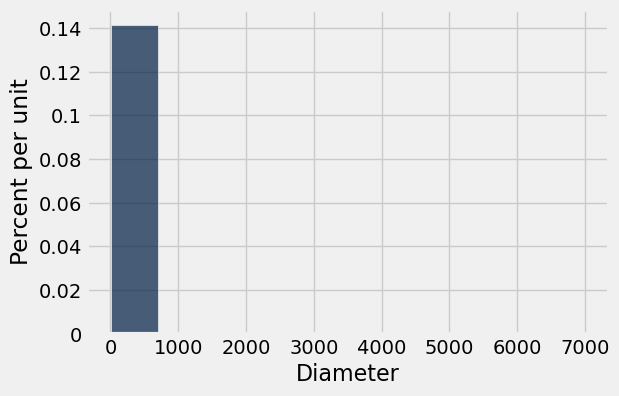

In [35]:
diameter_no_nan.hist('Diameter')

Well, it worked, but what a boring histogram!  There must be a few large asteroids and many, many, small ones.

In [36]:
max(diameter_no_nan.column('Diameter'))

7000.0

Let's limit our histogram to asteoroids under 1000 meters in diameter.

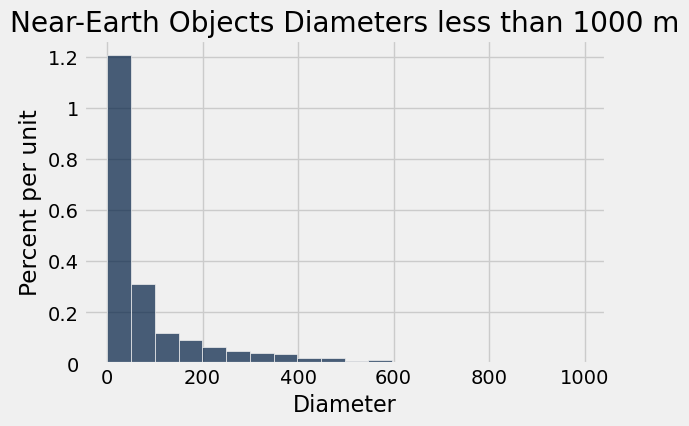

In [41]:
diameter_no_nan.where('Diameter', are.below(1000)).hist('Diameter', bins=20)
plt.title("Near-Earth Objects Diameters less than 1000 m");

# Concluding Remarks

Well, we did it, but it was a lot of work. 

Here is a very telling quote [ref](https://www.appier.com/en/blog/means-data-scientist-today):

>What Makes for a Good Data Scientist

>Of course, every job has some less lovable bits and the burden of the data scientist is data cleaning! In most cases, the data we gather is ‘dirty’, with errors and discrepancies in it. For example, data showing that sales of a product have dropped dramatically may simply mean that malfunctioning machines have failed to capture the data accurately.

>Most data scientists will agree that data cleaning is the most boring part of this job. Our inside joke is that data science is 80 percent cleaning of data and 20 percent complaining about it!

>But jokes aside, data cleaning is painstaking but important work. If not done right, it can have a huge impact on the accuracy and reliability of insights.